In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from time import time
import gc
import os
from sklearn.model_selection import train_test_split

%matplotlib inline

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', -1)

In [2]:
class Flags():
    export=True
    out_path = 'assets/'
    reduce = 0.1
    calc_normalization = True
flags = Flags()

In [3]:
raw = pd.read_csv (flags.out_path + 'dataset_original.csv', header=0, decimal=',')
print('Original Shape', raw.shape)

flags.out_path += str(flags.reduce) + '/'
if not os.path.exists(flags.out_path): os.mkdir(flags.out_path)

Original Shape (737453, 24)


In [4]:
_, reduced = train_test_split(raw, test_size=flags.reduce, random_state=100)
print('Reduced Shape', reduced.shape)

if flags.export: 
    reduced.to_csv(flags.out_path + "dataset_reduced.csv", index=False)
    
y_reduced = reduced['% Silica Concentrate']
X_reduced = reduced.drop(['% Silica Concentrate', 'date'], axis=1)

Reduced Shape (73746, 24)


In [5]:
# Normalization (mean 0 and std 1)
if flags.calc_normalization:
    time0 = time()
    X_reduced = (X_reduced-X_reduced.mean())/(X_reduced.std())
    time1 = time()
    print("%.2f s" % (time1 - time0))
    if flags.export: 
        X_reduced.to_csv(flags.out_path + "dataset_normalized.csv", index=False)
else:
    X_reduced = pd.read_csv(flags.out_path + "dataset_normalized.csv")

0.23 s


# PCA

0.46 s


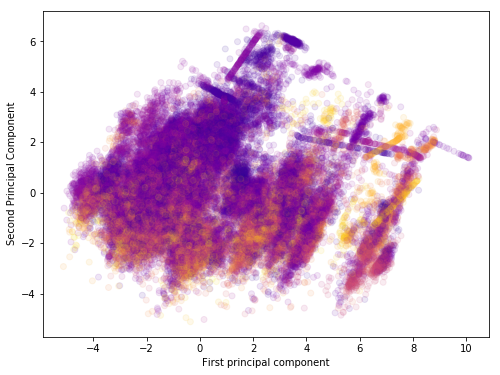

In [6]:
# Time:
#   700: 0.02 s
#   7k: 0.04 s
#   70k: 0.29 s
#   700k: 

from sklearn.decomposition import PCA
time0 = time()
pca = PCA(n_components=2)
pca.fit(X_reduced)
X_pca = pca.transform(X_reduced)
time1 = time()
print("%.2f s" % (time1 - time0))

plt.figure(figsize=(8,6))
plt.scatter(X_pca[:,0],X_pca[:,1],c=y_reduced,cmap='plasma', alpha=0.1)
plt.xlabel('First principal component')
plt.ylabel('Second Principal Component')
if flags.export: 
    pd.DataFrame(X_pca).to_csv(flags.out_path + "dataset_pca.csv", index=False)
    plt.savefig(flags.out_path + 'EDA_pca.eps')

# t-SNE

[t-SNE] Computing 301 nearest neighbors...
[t-SNE] Indexed 73746 samples in 0.286s...
[t-SNE] Computed neighbors for 73746 samples in 281.616s...
[t-SNE] Computed conditional probabilities for sample 1000 / 73746
[t-SNE] Computed conditional probabilities for sample 2000 / 73746
[t-SNE] Computed conditional probabilities for sample 3000 / 73746
[t-SNE] Computed conditional probabilities for sample 4000 / 73746
[t-SNE] Computed conditional probabilities for sample 5000 / 73746
[t-SNE] Computed conditional probabilities for sample 6000 / 73746
[t-SNE] Computed conditional probabilities for sample 7000 / 73746
[t-SNE] Computed conditional probabilities for sample 8000 / 73746
[t-SNE] Computed conditional probabilities for sample 9000 / 73746
[t-SNE] Computed conditional probabilities for sample 10000 / 73746
[t-SNE] Computed conditional probabilities for sample 11000 / 73746
[t-SNE] Computed conditional probabilities for sample 12000 / 73746
[t-SNE] Computed conditional probabilities for 

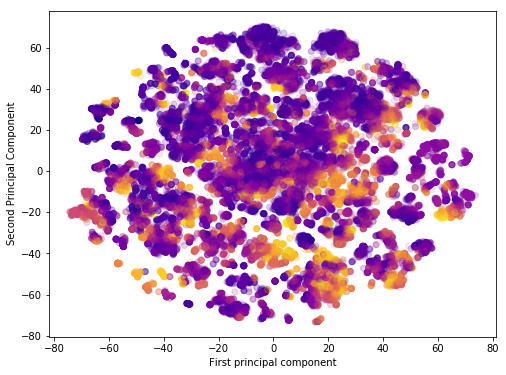

In [7]:
from sklearn.manifold import TSNE
time0 = time()
tsne = TSNE(n_components=2, learning_rate=400, verbose=1, early_exaggeration=20, perplexity=100)
X_tsne = tsne.fit_transform(X_reduced)
time1 = time()
print("%.2f s" % (time1 - time0))

plt.figure(figsize=(8,6))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c=y_reduced,cmap='plasma', alpha=0.1)
plt.xlabel('First component')
plt.ylabel('Second Component')
if flags.export: 
    pd.DataFrame(X_tsne).to_csv(flags.out_path + "dataset_tsne.csv", index=False)
    plt.savefig(flags.out_path + 'EDA_tsne.eps')